###### External Libraries

In [19]:
# Ipy preprocessor to make figures inline
%matplotlib inline

# Data Types
import numpy as np
import pandas as pd
from collections import OrderedDict

# Plotting
import matplotlib.pyplot as plt

# Ipython libraries
from ipywidgets import widgets
from ipywidgets import interactive
from IPython.display import display

# Ability to read csvfiles
import csv

___

###### Define Key Structures
Classes, Callbacks

In [20]:
## CLASSES ##
class Settings:
    """
    Contains a field storing all the relevant GUI objects that
    could be thought of as settings! (No methods for now, but
    maybe in the future.)
    """
    
    pdir=widgets.Text()
    sessionsID=widgets.Text()
    imageName=widgets.Text()
    
    # Constructor / Data
    def __init__(self):
        pass
    
class Params:
    """
    Class containing everything about parameters in the params file,
    and the GUI objects belonging thereto.
    """
    pdict = OrderedDict()
    pgui  = OrderedDict()
    
    # Contrstructor / Data
    def __init__(self):
        pass
    # Input method
    def readCSV(self,csvfile):
        
        print("File: " + csvfile)
        print()
        
        # Open CSV
        csvfile=open(csvfile,'r')
        reader = csv.reader(csvfile,delimiter=',')
        
        #Loop through file and write resulting dictionrary fields
        for row in reader:
            
            # Establish the general dictionary object recording the values
            Params.pdict[row[0]] = {}
            
            for r in row[1:]:
                Params.pdict[row[0]][str(r)] = r

        csvfile.close()
        
    def display(self):
        """
        Function that displays all the GUI elements and resultant image
        """
        evalstr = Params.getEvalString()
        return evalstr
    
    @staticmethod
    def getEvalString():
        '''
        Instead of calling the interactive inside the object method, I think jupyter only
        allows me to open it when and only when its evaluated in the base scope. Hence,
        this sloppy kluge of a solution. (I dislike using eval statements.)
        '''
        evalstr = "interactive(Params.displayCallback,"
        for key,val in Params.pdict.items():
            evalstr = evalstr + key + "=" + "Params.pdict['" + key + "']"  + ","
            
        evalstr = evalstr[0:-1]
        evalstr = evalstr + ")"
        print("Eval str formed -> " + evalstr)
        
        return evalstr
    
    @staticmethod
    def getImageString(paramDict):
        imstr = Settings.pdir.value
        
        index = []
        data = []
        for key,val in paramDict.items():
            l = list(Params.pdict.keys())
            i = l.index(key)
            index.append(i)
            d = '/' + key + '=' + str(val)
            data.append(d)
        
        ordered = pd.Series(data, index = index)
        ordered = pd.Series.sort_index(ordered)
        
        for d in ordered:
            imstr = imstr + d
        
        imstr = imstr + "/" + Settings.imageName.value

        print(imstr)
        return imstr
    
    @staticmethod
    def displayCallback(**paramDict):
        imstr = Params.getImageString(paramDict)
        print("File -> " + imstr)
        im = plt.imread(imstr)
        I=plt.imshow(im)
        print("Success!")
        

#         if len(V) > 0:
#             Params.pdict[k] = V;
#             # Generate the string from the current pdict
#             imagestr = Params.pdict['Settings'].pdir.value + '/'
#             for key,val in self.pdict.items():
#                 imagestr = imagestr + key + "=" + val + "/"
#             # 
#             image = plt.imread(imgstr)
#             imshow(image)
#         else:
#             print("Skipping ... received none.")

____

###### Instantiate GUI Objects & Pre-process

In [21]:
# --- GUI OBJECT INSTANTIATIONS ---
# Project directory input
Settings.pdir = widgets.Text("/Users/ryoung/Data/Miller/FindNetTone")
Settings.sessionID = widgets.Text("1stRun")
Settings.imageName = widgets.Text("ActivityLog.png")

***

##### Input Project Directory


In [22]:
display(Settings.pdir)
display(Settings.sessionID)
display(Settings.imageName)

##### Process Directory and Ready Visual

In [23]:
# Establish a reader indexing into the params file, using information provided above
params_file = Settings.pdir.value + "/" + Settings.sessionID.value + "_params.log"
    
# Instantiate Params GUI objects
P = Params()
P.readCSV(params_file)

File: /Users/ryoung/Data/Miller/FindNetTone/1stRun_params.log



### EXAMINE IMAGES

/Users/ryoung/Data/Miller/FindNetTone/sigma=0.2/pEE=0.08/WEErecurrent_factor=300/WEEasym_factor=35/WEI_factor=250/WIE_factor=-100/ActivityLog.png
File -> /Users/ryoung/Data/Miller/FindNetTone/sigma=0.2/pEE=0.08/WEErecurrent_factor=300/WEEasym_factor=35/WEI_factor=250/WIE_factor=-100/ActivityLog.png
Success!


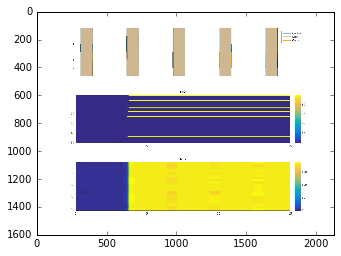

In [24]:

execution_interaction_string = P.display()
eval(execution_interaction_string)